<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


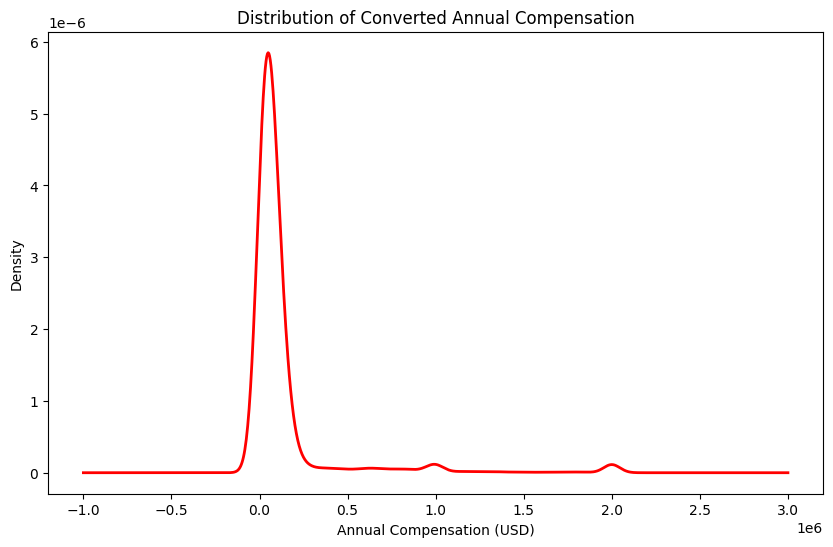

In [10]:
# your code goes here
# Importing necessary libraries
import scipy
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming df is your DataFrame)
# df = pd.read_csv('your_data_file.csv')  # Load your dataset if not already done

# Drop missing values in the ConvertedComp column
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Plotting the distribution
plt.figure(figsize=(10, 6))

# Add a density plot
df_cleaned['ConvertedComp'].plot(kind='kde', color='red', linewidth=2)

# Adding titles and labels
plt.title('Distribution of Converted Annual Compensation')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Density')

# Show the plot
plt.show()


Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

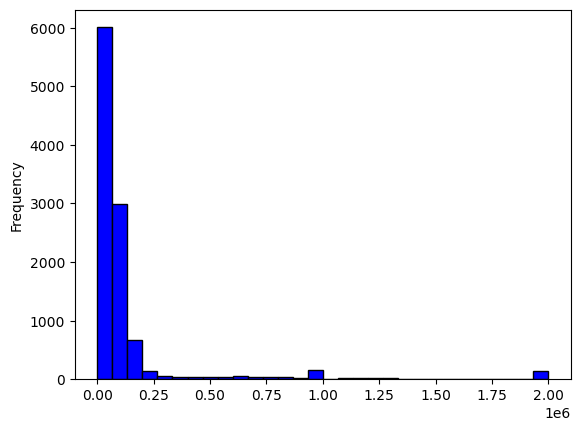

In [11]:
# your code goes here
df_cleaned['ConvertedComp'].plot(kind='hist', bins=30, color='blue', edgecolor='black')


What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
df_cleaned['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [14]:
# your code goes here
df[df['Gender']=='Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# your code goes here
df[df['Gender']=='Woman'].shape[0]

731

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

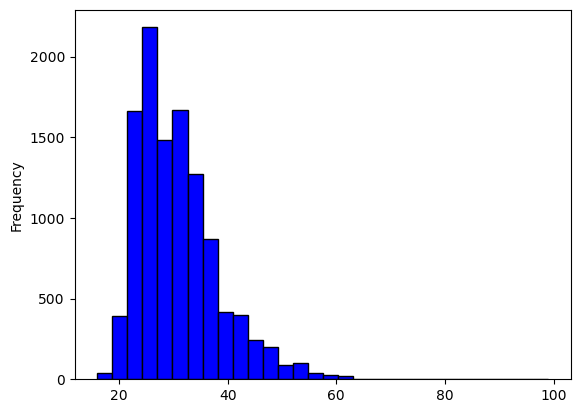

In [17]:
# your code goes here
df['Age'].plot(kind='hist', bins=30, color='blue', edgecolor='black')


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


{'whiskers': [<matplotlib.lines.Line2D at 0x7d00f20>,
 'caps': [<matplotlib.lines.Line2D at 0x70c4b10>,
 'boxes': [<matplotlib.patches.PathPatch at 0xa859178>],
 'medians': [<matplotlib.lines.Line2D at 0xac20970>],
 'fliers': [<matplotlib.lines.Line2D at 0xac24ce0>],
 'means': []}

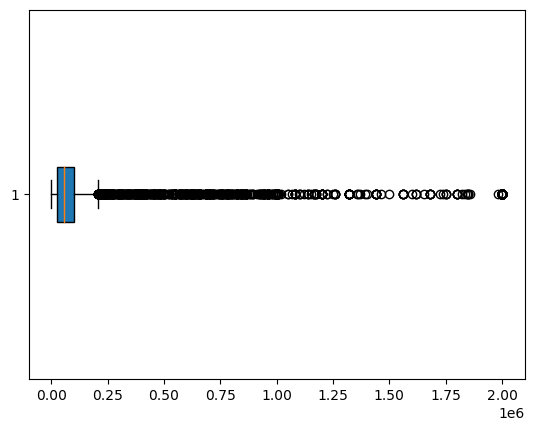

In [19]:
# your code goes here
plt.boxplot(df_cleaned['ConvertedComp'], vert=False, patch_artist=True)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
# your code goes here
# Importing necessary libraries
import pandas as pd

# Load the data (assuming df is your DataFrame)
# df = pd.read_csv('your_data_file.csv')  # Load your dataset if not already done

# Drop missing values in the ConvertedComp column
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Calculate Q1 (25th percentile)
Q1 = df_cleaned['ConvertedComp'].quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = df_cleaned['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Display the results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")


Q1: 26868.0
Q3: 100000.0
IQR: 73132.0


Find out the upper and lower bounds.


In [22]:
# your code goes here
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print(f"lower bound:{lower}, upper bound: {upper}")

lower bound:-82830.0, upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# your code goes here
# Identify outliers
outliers = df_cleaned[(df_cleaned['ConvertedComp'] < lower) | (df_cleaned['ConvertedComp'] > upper)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Display the number of outliers
print(f"Number of outliers in the ConvertedComp column: {number_of_outliers}")

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
# your code goes here
df_no_outliers = df_cleaned[(df_cleaned['ConvertedComp'] >= lower) & (df_cleaned['ConvertedComp'] <= upper)]


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns[numerical_columns != 'Age']

Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs',
       'CodeRevHrs'],
      dtype='object')

In [28]:
# your code goes here
# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Get the correlation of 'Age' with all other numerical columns
age_correlation = correlation_matrix['Age']

# Display the correlation values
age_correlation

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
